<a href="https://colab.research.google.com/github/Shallom12/Autonomous-driving-of-Chungnam-Human-Resources-Development-Institute/blob/main/day1_lab_questions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Day 1 Lab: 칼만필터와 데이터 추적기법 (Kalman Filter and Data Tracking)
이 노트북은 자율주행 데이터 처리 강의의 첫 번째 실습입니다. 각 실습은 Python 표준 라이브러리, NumPy, matplotlib만 사용하며, 센서 데이터의 노이즈 보정과 융합을 다룹니다.


## Lab 1: 1D 칼만필터로 노이즈 위치 데이터 보정하기

**목표:**
- 노이즈가 섞인 1차원 위치 데이터를 Kalman Filter로 보정합니다.
- Python 표준 라이브러리만 사용합니다.

**단계:**
1. `random.gauss`로 노이즈가 있는 위치 데이터 10개를 생성하세요.
2. 칼만필터의 예측-갱신 과정을 코드로 구현하세요.
3. 보정된 최종 위치 추정값을 출력하세요.

**예상 출력:**
- 보정 전 위치 리스트, 보정 후 최종 추정값


In [ ]:
# 1D 칼만필터 예제 (Python 표준 라이브러리)
import random

# Step 1: 노이즈가 있는 위치 데이터 생성
true_position = 0
measured_positions = [true_position + random.gauss(0, 1) for _ in range(10)]
print('측정 위치:', measured_positions)

# Step 2: 칼만필터 초기값 설정
estimate = 0
estimate_error = 1
measurement_error = 1

# Step 3: 예측-갱신 반복
for z in measured_positions:
    # 예측 (Prediction)
    predicted_estimate = estimate
    predicted_estimate_error = estimate_error

    # 갱신 (Update)
    kalman_gain = predicted_estimate_error / (predicted_estimate_error + measurement_error)
    estimate = predicted_estimate + kalman_gain * (z - predicted_estimate)
    estimate_error = (1 - kalman_gain) * predicted_estimate_error

print('최종 추정값:', estimate)

측정 위치: [0.9846893630469108, 1.305981320367657, 0.30704346316102465, -0.6345419149854019, -1.1718353805815829, 0.27802184549720343, 1.049179518334631, 0.48933159960231115, -0.6502550018946776, -1.333752575734273]
최종 추정값: 0.056714748801254766


## Lab 2: 센서 융합 (GPS + IMU) 가중 평균 실습

**목표:**
- GPS와 IMU(속도계) 데이터를 가중 평균으로 융합하여 더 정확한 위치를 추정합니다.
- Python 표준 라이브러리만 사용합니다.

**단계:**
1. `random.gauss`로 GPS 위치 데이터 10개, IMU 위치 데이터 10개를 각각 생성하세요.
2. 두 센서의 신뢰도를 다르게 설정하고(예: GPS: 0.6, IMU: 0.4), 가중 평균으로 융합하세요.
3. 융합 결과 리스트를 출력하세요.

**예상 출력:**
- GPS, IMU, 융합 위치 리스트

In [ ]:
# 센서 융합 (GPS + IMU) 가중 평균 예제
import random

# Step 1: GPS, IMU 위치 데이터 생성
true_position = 0
gps_positions = [true_position + random.gauss(0, 1) for _ in range(10)]
imu_positions = [true_position + random.gauss(0, 2) for _ in range(10)]

# Step 2: 신뢰도(가중치) 설정
w_gps = 0.6
w_imu = 0.4

# Step 3: 가중 평균 융합
fused_positions = [(w_gps * gps + w_imu * imu) for gps, imu in zip(gps_positions, imu_positions)]

print('GPS:', gps_positions)
print('IMU:', imu_positions)
print('융합:', fused_positions)

GPS: [0.7819820026904936, -0.06961159166523341, -0.48523592874044696, -2.4843625331161774, 0.18380299729992777, 1.0515156976293663, -1.4721188040444462, 1.0225147511224537, 1.1259202179713508, -0.03646407889700808]
IMU: [1.7839753707330364, -0.06546572252436639, 0.5797083993720837, -0.512512934537691, -0.1016410838612701, -1.5841971721414894, 1.424053281036067, 3.2448288896194275, 2.1917683886699053, -0.4769323504812718]
융합: [1.1827793499075105, -0.0679532440088866, -0.05925819749543465, -1.695622693684783, 0.06962536483544862, -0.0027694502789760156, -0.3136499700122408, 1.9114404065212431, 1.5522594862507726, -0.21265138753071358]


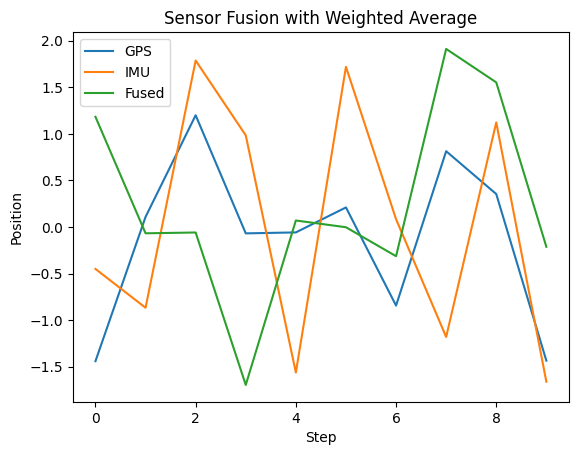

In [ ]:
# 센서 융합 (GPS + IMU) 가중 평균 예제
import random
import matplotlib.pyplot as plt

# Step 1: GPS, IMU 위치 데이터 생성
true_position = 0
gps_positions = [true_position + random.gauss(0, 1) for _ in range(10)]
imu_positions = [true_position + random.gauss(0, 2) for _ in range(10)]

# Step 2: 신뢰도(가중치) 설정
w_gps = 0.7
w_imu = 0.3

# Step 3: 가중 평균 융합
## FILL THIS

# Step 4: 시각화
plt.plot(gps_positions, label='GPS')
plt.plot(imu_positions, label='IMU')
plt.plot(fused_positions, label='Fused')
plt.legend()
plt.title('Sensor Fusion with Weighted Average')
plt.xlabel('Step')
plt.ylabel('Position')
plt.show()

## Lab 3: CSV 데이터에 칼만필터 적용 및 시각화

**목표:**
- CSV 파일(또는 생성된 데이터)에서 위치 데이터를 불러와 칼만필터로 보정하고, 결과를 시각화합니다.
- Python 표준 라이브러리, NumPy, matplotlib 사용

**단계:**
1. (선택) CSV 파일이 없으면 `random.gauss`로 데이터 생성
2. 칼만필터로 보정된 위치 계산
3. matplotlib으로 원본 vs. 보정 데이터 플롯

**예상 출력:**
- 원본/보정 위치 리스트, 플롯 이미지

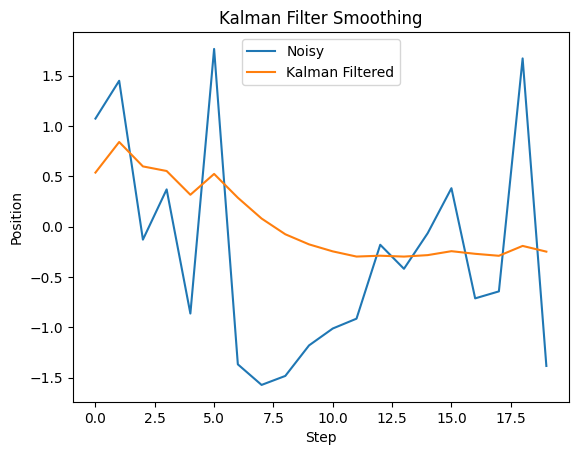

In [ ]:
# 칼만필터로 CSV(또는 생성) 데이터 보정 및 시각화
import random
import numpy as np
import matplotlib.pyplot as plt

# Step 1: 데이터 불러오기 또는 생성
try:
    import pandas as pd
    data = pd.read_csv('positions.csv')
    measured_positions = data['position'].tolist()
except Exception:
    measured_positions = [random.gauss(0, 1) for _ in range(20)]

# Step 2: 칼man Filter 적용
estimate = 0
estimate_error = 1
measurement_error = 1
estimates = []
for z in measured_positions:
    # 예측 (Prediction)
    predicted_estimate = estimate
    predicted_estimate_error = estimate_error

    # 갱신 (Update)
    kalman_gain = predicted_estimate_error / (predicted_estimate_error + measurement_error)
    estimate = predicted_estimate + kalman_gain * (z - predicted_estimate)
    estimate_error = (1 - kalman_gain) * predicted_estimate_error
    estimates.append(estimate)

# Step 3: 시각화
plt.plot(measured_positions, label='Noisy')
plt.plot(estimates, label='Kalman Filtered')
plt.legend()
plt.title('Kalman Filter Smoothing')
plt.xlabel('Step')
plt.ylabel('Position')
plt.show()

---

### 오늘의 실습 정리
- 칼만필터로 노이즈 데이터 보정, 센서 융합, 시각화까지 경험했습니다.
- Colab에서 결과(플롯, 수치)를 저장해 제출하세요.
- 질문은 강의 포럼/이메일로!
